# 판다스 내장 그래프 도구
- 판다스 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 import 하지않고 간단히 그래프를 그릴 수 있다.
- 선 그래프: df.plot() 메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본저깅ㄴ 선 그래프를 그림.
- 막대 그래프: df.plot(kind='bar'),df.plot(kind='barh',stacked=True,alpha=0.8)
- 히스토그램 : df.plot(kind='hist') 확률변수의 분포.
- 산점도: df.plot(x='',y='','kind='scatter') 상관관계를 볼 수 있다.
- 박스 플롯: df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산정도에 대한 정보를 제공. 분포를 보는것/ 이상치 (outlier)확인하기에 유용

# Matplotlib
- histobram : plt.hist(x, bin= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width=, color='')
- scatter plot : plt.scatter(x,y)

# Seaborn
- sns.distplot(data, bins=, color=, kde=)
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.jointplot(x, y, data, color)                       
- sns.parirplot(data, hue, plalette)                       
- sns.lmplot(x, y, data, color)
- sns.regplot(x,y,data,fig_reg=False)


In [6]:
import pandas as pd
import numpy as np

df= pd.read_csv('dataset/주가데이터.csv')
df.head()

Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [8]:

df['NDate']=pd.to_datetime(df.Date)

df1= df.set_index('NDate')

df1.drop(['Date','Volume'],axis=1,inplace=True)

df1.head()

Close  Start   High    Low
NDate                                 
2018-07-02  10100  10850  10900  10000
2018-06-29  10700  10550  10900   9990
2018-06-28  10400  10900  10950  10150
2018-06-27  10900  10800  11050  10500
2018-06-26  10800  10900  11000  10700

<AxesSubplot:xlabel='NDate'>

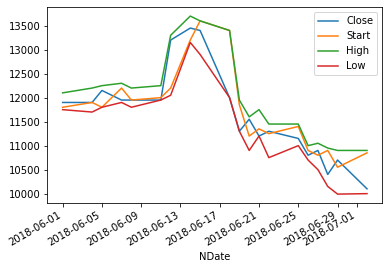

In [9]:
df1.plot()

<AxesSubplot:xlabel='NDate'>

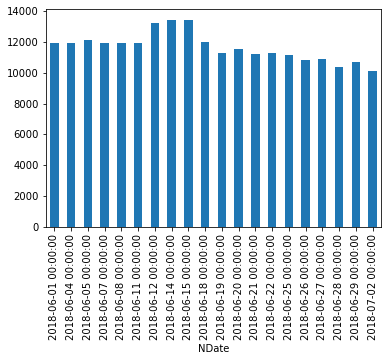

In [10]:
df1.Close[::-1].plot(kind='bar')

# [::-1] 해주면 역순으로 

In [11]:
# Q. 6월만을 추출하여 Close칼럼으로 일별 막대 그래프를 표현하세요


<AxesSubplot:xlabel='NDate'>

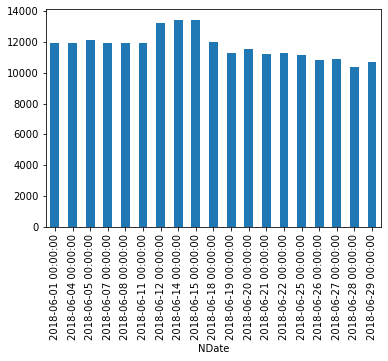

In [12]:
# df1['2018-6']
df1.loc['2018-6','Close'][::-1].plot(kind='bar')

In [13]:
df1.Close.value_counts()

11950    3
11300    2
11900    2
10400    1
13450    1
10700    1
11150    1
10800    1
12000    1
13200    1
10100    1
12150    1
13400    1
11200    1
10900    1
11550    1
Name: Close, dtype: int64

<AxesSubplot:ylabel='Frequency'>

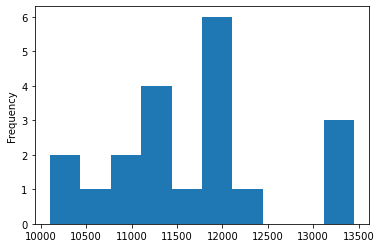

In [14]:
df1.Close.plot(kind='hist')  # + , bins=16) <--전체 구간을 몇개로 나눌지

In [15]:
# df1.Close.value_counts()[:]
# df1.Close.value_counts().sort_index()

# df1.Close.value_counts().plot(kind='hist',bins=10)
# # 


In [16]:
# Q. df에서 Volume칼럼의 분포를 탐색하는 히스토그램을 표현하세요

<AxesSubplot:ylabel='Frequency'>

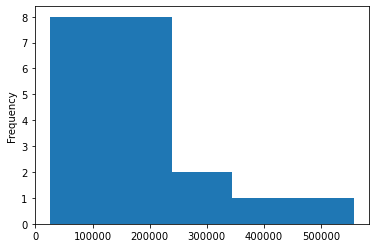

In [17]:
df.Volume.plot(kind='hist',bins=5)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

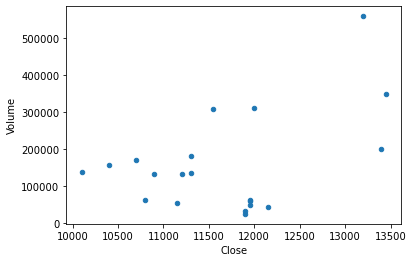

In [18]:
# Close 칼럼과 Volume 칼럼으로 산점도를 표현하세요.
df.plot(x='Close',y='Volume',kind='scatter')


<AxesSubplot:>

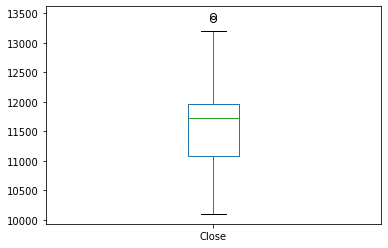

In [19]:
# Q. Close 칼럼의 Box Plot을 표현하세요 

df.Close.plot(kind='box')

In [20]:
df.Close.describe

# 25 1사분위 
# iqr = 11962.5-11087.5
# upper = 11962.5 + iqr*1.5
# lower = 11087.5 - iqr*1.5

# Interquartile range


<bound method NDFrame.describe of 0     10100
1     10700
2     10400
3     10900
4     10800
5     11150
6     11300
7     11200
8     11550
9     11300
10    12000
11    13400
12    13450
13    13200
14    11950
15    11950
16    11950
17    12150
18    11900
19    11900
Name: Close, dtype: int64>

In [21]:
# Q. Close컬럼의 이상치 
df.corr()

Close     Start      High       Low    Volume
Close   1.000000  0.856181  0.941201  0.946297  0.441466
Start   0.856181  1.000000  0.961009  0.921467  0.337829
High    0.941201  0.961009  1.000000  0.945487  0.484145
Low     0.946297  0.921467  0.945487  1.000000  0.246323
Volume  0.441466  0.337829  0.484145  0.246323  1.000000

### Box plot 의미 해석
- 중앙값
- IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
- lower whisker: Q1 - 1.5*IQR 이내인 값중에서 최솟값
- upper whisker: Q3+ 1.5*IQR 이내인 값중에서 최대값 
- 이상치: lower whisker, upper whisker를 벗어나는 값 

In [22]:
# Q. Close칼럼의 이상치 구하기


# 다시해보기 

In [23]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
outlier = []
for i in df.Close:
    if not Q1 - IQR*1.5 <= i <= Q3 + IQR*1.5:
        outlier.append(i)
print(outlier)


[13400, 13450]


In [25]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Close']<=(Q1-IQR*1.5))|(df['Close']>=(Q3+IQR*1.5))]
abv

# df['Close']<=(Q1-IQR*1.5)

Date  Close  Start   High    Low  Volume      NDate
11  2018-06-15  13400  13600  13600  12900  201376 2018-06-15
12  2018-06-14  13450  13200  13700  13150  347451 2018-06-14

In [89]:
df_ep = pd.read_excel('dataset/df_ep.xlsx')
df_ep.head()


year  south  north
0  1990   1077    277
1  1991   1186    263
2  1992   1310    247
3  1993   1444    221
4  1994   1650    231

<AxesSubplot:xlabel='year'>

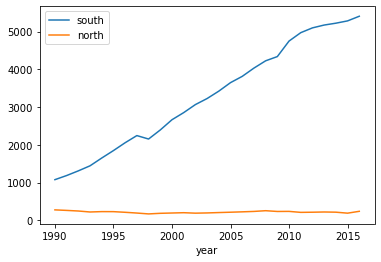

In [98]:
df_ep.set_index('year',inplace=True)
df_ep.plot()

In [99]:
# 남북한 발전량 데이터를 시각적으로 탐색하고
# 그 특징을 요약기술하기 

In [4]:
import pandas as pd
df_auto= pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()


mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino